<a href="https://colab.research.google.com/github/martinsadw/alura/blob/main/Pandas%20-%20conhecendo%20a%20biblioteca/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv

--2024-04-17 08:28:43--  https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1601163 (1.5M) [text/plain]
Saving to: ‘aluguel.csv’

aluguel.csv         100%[===================>]   1.53M  --.-KB/s    in 0.009s  

2024-04-17 08:28:44 (169 MB/s) - ‘aluguel.csv’ saved [1601163/1601163]



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Importing

In [ ]:
rent = pd.read_csv('aluguel.csv', sep=';')
rent.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [ ]:
rent.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


In [ ]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


# 2. Exploring

<Axes: title={'center': 'Valor médio por tipo'}, ylabel='Tipo'>

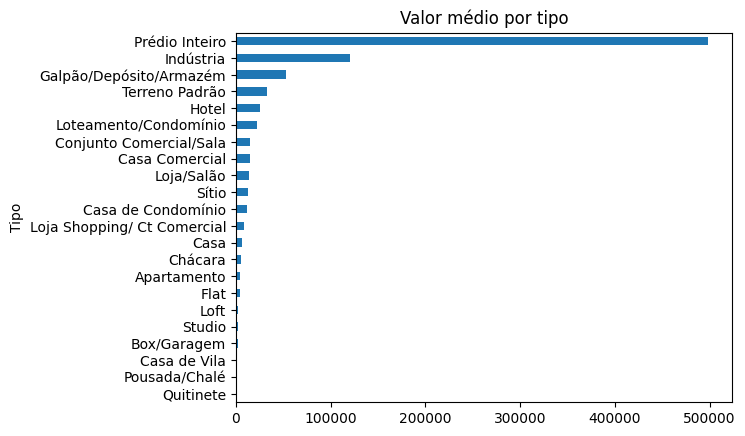

In [ ]:
mean_by_type = rent.groupby('Tipo').mean(numeric_only=True)
mean_by_type['Valor'].sort_values().plot(kind='barh', title='Valor médio por tipo')

## Removing comercial real state

In [ ]:
comercial_group = ['Conjunto Comercial/Sala', 'Prédio Inteiro', 'Loja/Salão',
                   'Galpão/Depósito/Armazém', 'Casa Comercial', 'Terreno Padrão',
                   'Loja Shopping/ Ct Comercial', 'Box/Garagem', 'Chácara',
                   'Loteamento/Condomínio', 'Sítio', 'Pousada/Chalé', 'Hotel',
                   'Indústria']
individual_group = ['Quitinete', 'Loft', 'Flat', 'Casa de Vila', 'Studio', 'Apartamento', 'Casa', 'Casa de Condomínio']

In [ ]:
individual_rent = rent.query('Tipo not in @comercial_group')

## Exploring real state by type

In [ ]:
individual_rent.Tipo.value_counts(normalize=True)

Tipo
Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: proportion, dtype: float64

<Axes: title={'center': 'Quantidade por tipo'}, ylabel='Tipo'>

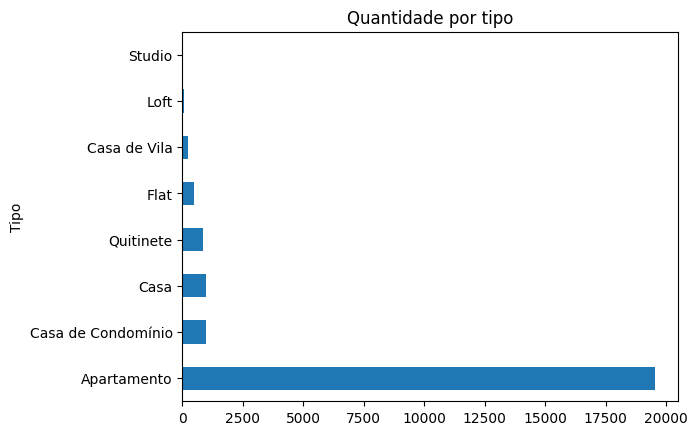

In [ ]:
individual_rent.Tipo.value_counts().plot(kind='barh', title='Quantidade por tipo')

In [ ]:
individual_mean_by_type = individual_rent.groupby('Tipo').mean(numeric_only=True)
individual_mean_by_type

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667
Loft,1.117647,0.666667,0.372549,58.372549,2557.882353,869.239130,238.243243
Quitinete,0.834928,0.017943,0.037081,28.954545,1246.840909,427.341969,75.790741
Studio,0.500000,0.250000,0.000000,103.250000,2400.000000,549.000000,151.250000


<Axes: title={'center': 'Área média por tipo'}, ylabel='Tipo'>

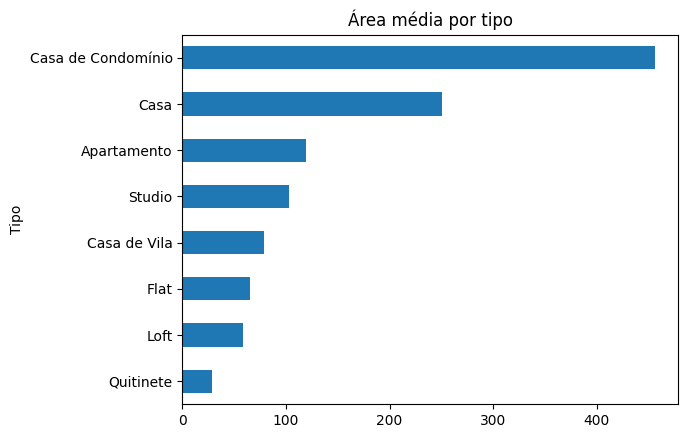

In [ ]:
individual_mean_by_type['Area'].sort_values().plot(kind='barh', title='Área média por tipo')

<Axes: title={'center': 'Valor médio por tipo'}, ylabel='Tipo'>

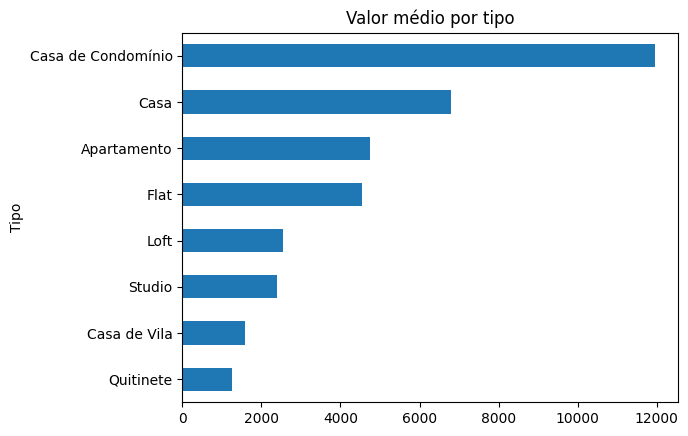

In [ ]:
individual_mean_by_type['Valor'].sort_values().plot(kind='barh', title='Valor médio por tipo')

## Keeping only apartment in the dataset

In [ ]:
apartment_rent = rent.query('Tipo == "Apartamento"').copy()

# 3. Answering questions


1. Calcular a média de quartos por apartamento;
1. Conferir quantos bairros únicos existem na nossa base de dados;
1. Analisar quais bairros possuem a média de valor de aluguel mais elevadas;
1. Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

### Média de quartos por apartamento

In [ ]:
print('Quantidade média de quartos: %.2f' % apartment_rent.Quartos.mean())

Quantidade média de quartos: 2.48


### Quantos bairros únicos existem na nossa base de dados

In [ ]:
print("Quantidade de bairros únicos:", apartment_rent.Bairro.nunique())

Quantidade de bairros únicos: 149


### Quais bairros possuem a média de valor de aluguel mais elevadas

In [ ]:
apartment_rent_by_neighborhood = apartment_rent.groupby('Bairro')['Valor'].mean().sort_values(ascending=False)
apartment_rent_by_neighborhood.to_frame().head(10)

,Valor
Bairro,
Joá,15500.000000
Arpoador,12429.769231
Cidade Jardim,12000.000000
Ipanema,9487.205317
Botafogo,9369.207116
Leblon,8637.761483
Lagoa,8063.804928
São Conrado,7859.871245
Jardim Oceânico,7626.086957


### Bairros com as médias de valores de aluguel mais elevadas

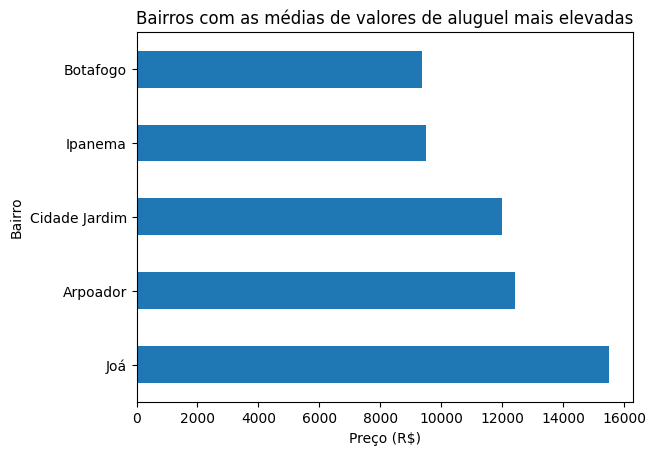

In [ ]:
apartment_rent_by_neighborhood[:5].plot(kind='barh', title='Bairros com as médias de valores de aluguel mais elevadas', xlabel='Preço (R$)');

# 4. Treating null values

In [ ]:
apartment_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19532 entries, 3 to 32958
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        19532 non-null  object 
 1   Bairro      19532 non-null  object 
 2   Quartos     19532 non-null  int64  
 3   Vagas       19532 non-null  int64  
 4   Suites      19532 non-null  int64  
 5   Area        19532 non-null  int64  
 6   Valor       19525 non-null  float64
 7   Condominio  18787 non-null  float64
 8   IPTU        14060 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.5+ MB


In [ ]:
total_entries = len(apartment_rent)
null_columns = ['Valor', 'Condominio', 'IPTU']
print("### Null values")
for column in null_columns:
    null_values = apartment_rent[column].isna().sum()
    print('- %s: %d / %d (%.2f%%)' % (column, null_values, total_entries, null_values / total_entries * 100))


### Null values
- Valor: 7 / 19532 (0.04%)
- Condominio: 745 / 19532 (3.81%)
- IPTU: 5472 / 19532 (28.02%)


In [ ]:
def get_outliers(df, col_name, std_range=2.7):
    interval = std_range * df[col_name].std()
    mean = df[col_name].mean()
    # print(col_name, mean, interval)
    return (df[col_name] < (mean - interval)) | (df[col_name] > (mean + interval))

In [ ]:
fixed_apartment_rent = apartment_rent.copy()

## Checking null values

In [ ]:
apartment_rent.loc[apartment_rent['Valor'].isna()].head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2973,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
12683,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
13229,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
13525,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


In [ ]:
apartment_rent.loc[apartment_rent['Condominio'].isna()].head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
113,Apartamento,Praça Seca,2,0,0,80,1000.0,NaN,NaN
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,NaN,NaN
194,Apartamento,Barra da Tijuca,1,1,1,65,2350.0,NaN,NaN
258,Apartamento,Cidade Nova,1,0,0,46,1000.0,NaN,NaN
265,Apartamento,Olaria,1,0,0,39,800.0,NaN,NaN
275,Apartamento,Leblon,3,0,1,85,8500.0,NaN,1719.0
292,Apartamento,Tomás Coelho,2,0,0,70,800.0,NaN,NaN
402,Apartamento,Campo Grande,2,0,1,58,1000.0,NaN,NaN


In [ ]:
apartment_rent.loc[apartment_rent['IPTU'].isna()].head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
23,Apartamento,Olaria,3,1,0,68,1000.0,670.0,NaN
24,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,NaN
32,Apartamento,Botafogo,2,1,0,76,2500.0,740.0,NaN
36,Apartamento,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,NaN
47,Apartamento,Recreio dos Bandeirantes,2,2,2,90,3000.0,1340.0,NaN
48,Apartamento,Recreio dos Bandeirantes,3,2,2,100,2600.0,380.0,NaN
71,Apartamento,Ipanema,3,2,1,150,8000.0,2400.0,NaN


## Relationship between Area and IPTU

### Exploring

In [ ]:
apartment_by_neighborhood = apartment_rent.groupby('Bairro').agg({'Valor': ['mean', 'count']})
apartment_by_neighborhood.columns = apartment_by_neighborhood.columns.droplevel()
filter_apartment_by_neighborhood = apartment_by_neighborhood.query('count >= 100').sort_values('mean', ascending=False)

In [ ]:
df = apartment_rent.copy()
df['IPTU/Area'] = df['IPTU'] / df['Area']
df['IPTU/Area medio'] = df.groupby('Bairro')['IPTU/Area'].transform('mean')

area_outliers = get_outliers(df, 'Area')
iptu_outliers = get_outliers(df, 'IPTU')
valor_outliers = get_outliers(df, 'Valor')
ratio_outliers = get_outliers(df, 'IPTU/Area medio')

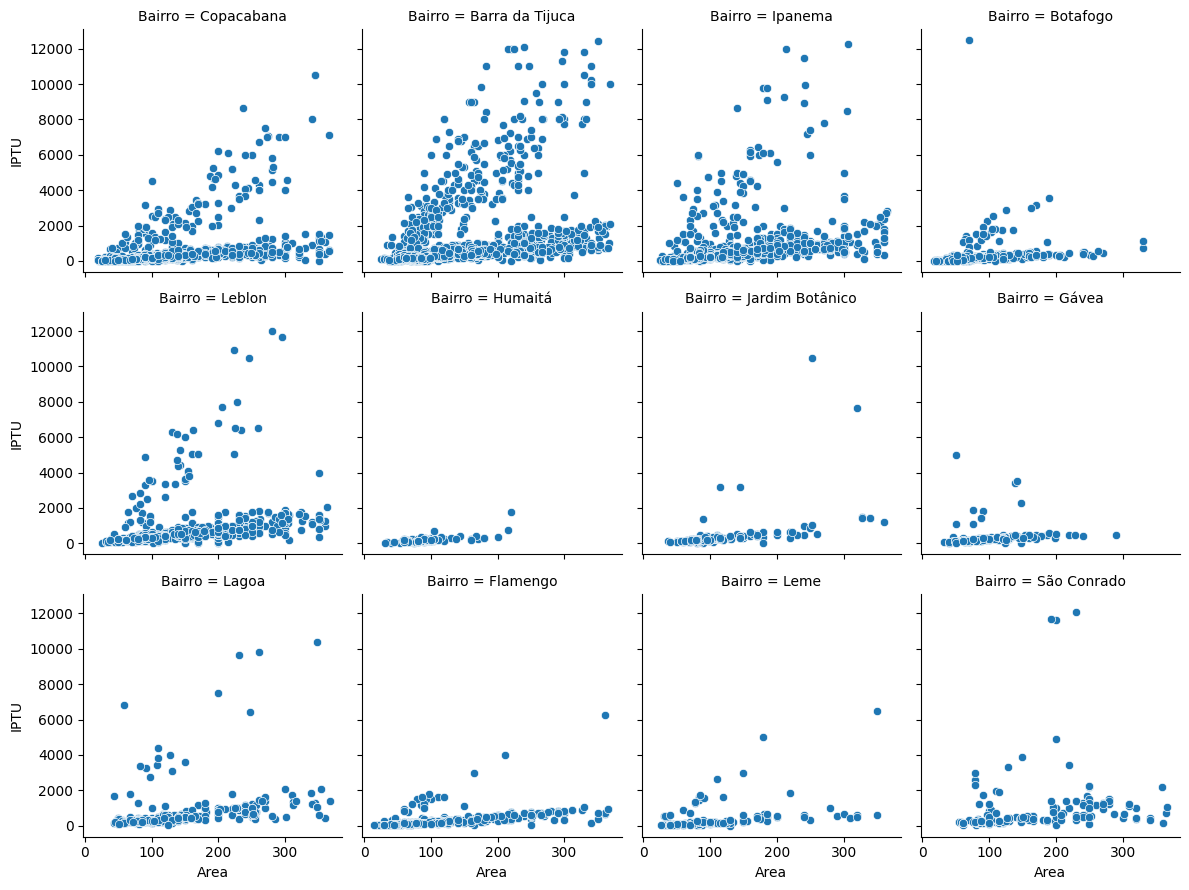

In [ ]:
expensive_neighborhood = list(filter_apartment_by_neighborhood[:12].index)
neighborhood_filter = df.Bairro.isin(expensive_neighborhood)
mask = ~area_outliers & ~iptu_outliers & ~valor_outliers & neighborhood_filter

sns.relplot(x='Area', y='IPTU', col='Bairro', data=df.loc[mask], col_wrap=4, height=3);

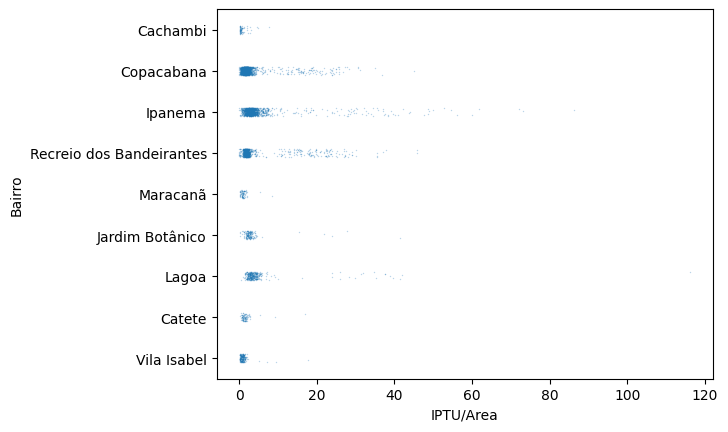

In [ ]:
expensive_neighborhood = list(filter_apartment_by_neighborhood.sort_values('mean', ascending=False)[::3].index)
neighborhood_filter = df.Bairro.isin(expensive_neighborhood)
mask = ~area_outliers & ~iptu_outliers & ~valor_outliers & neighborhood_filter

sns.stripplot(x='IPTU/Area', y='Bairro', data=df.loc[mask], s=1, alpha=0.3);

<Axes: xlabel='Valor', ylabel='IPTU/Area medio'>

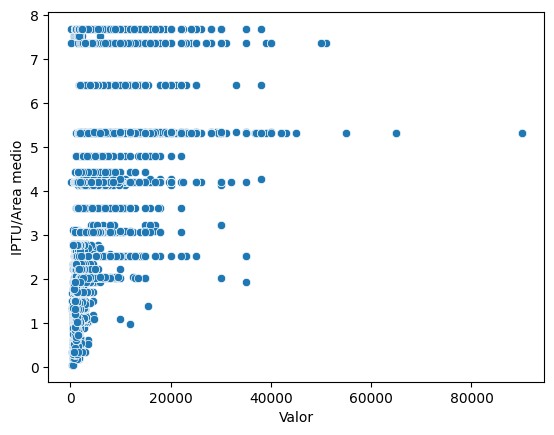

In [ ]:
expensive_neighborhood = list(filter_apartment_by_neighborhood.sort_values('mean', ascending=False)[::2].index)
neighborhood_filter = df.Bairro.isin(expensive_neighborhood)
mask = ~valor_outliers & ~ratio_outliers
sns.scatterplot(x='Valor', y='IPTU/Area medio', data=df.loc[mask])

### Fixing

In [ ]:
fixed_apartment_rent['IPTU/Area'] = fixed_apartment_rent['IPTU'] / fixed_apartment_rent['Area']
fixed_apartment_rent['IPTU/Area medio'] = fixed_apartment_rent.groupby('Bairro')['IPTU/Area'].transform('mean')

na_iptu = fixed_apartment_rent.loc[fixed_apartment_rent['IPTU'].isna()]
fixed_apartment_rent.loc[fixed_apartment_rent['IPTU'].isna(), 'IPTU'] = na_iptu['Area'] * na_iptu['IPTU/Area medio']

fixed_apartment_rent.drop(['IPTU/Area', 'IPTU/Area medio'], axis=1, inplace=True)

## Fallback Fixing

In [ ]:
fixed_apartment_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19532 entries, 3 to 32958
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        19532 non-null  object 
 1   Bairro      19532 non-null  object 
 2   Quartos     19532 non-null  int64  
 3   Vagas       19532 non-null  int64  
 4   Suites      19532 non-null  int64  
 5   Area        19532 non-null  int64  
 6   Valor       19525 non-null  float64
 7   Condominio  18787 non-null  float64
 8   IPTU        19324 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.5+ MB


In [ ]:
# Fallback fixing
fixed_apartment_rent.fillna(0, inplace=True)
fixed_apartment_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19532 entries, 3 to 32958
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        19532 non-null  object 
 1   Bairro      19532 non-null  object 
 2   Quartos     19532 non-null  int64  
 3   Vagas       19532 non-null  int64  
 4   Suites      19532 non-null  int64  
 5   Area        19532 non-null  int64  
 6   Valor       19532 non-null  float64
 7   Condominio  19532 non-null  float64
 8   IPTU        19532 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.5+ MB


# 5. Removing incorrect entries

## Zeros

In [ ]:
# Entries with 'Valor' or 'Condominio' equal to zero are considered invalid entries
incorrect_entries = fixed_apartment_rent.query('Valor == 0 | Condominio == 0').index
filtered_apartment_rent = fixed_apartment_rent.drop(incorrect_entries)

## Columns

In [ ]:
# The column 'Tipo' was filtered to only include values equal to 'Apartamento' and can be droped
filtered_apartment_rent.drop('Tipo', axis=1, inplace=True)

## Outliers (Not used)

In [ ]:
fixed_apartment_rent

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.000000
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,21.841174
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.000000
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.000000
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,69.146076
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,77.901069
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.000000
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.000000
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.000000


<Axes: >

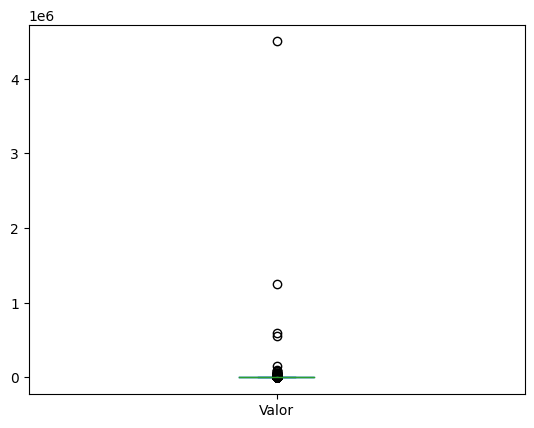

In [ ]:
fixed_apartment_rent.Valor.plot.box()

In [ ]:
fixed_apartment_rent.query('Valor > 50000').sort_values('Valor')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
8575,Apartamento,Leblon,4,2,2,650,51000.0,7000.0,4779.598580
7582,Apartamento,Ipanema,4,1,4,470,55000.0,7500.0,3200.000000
14325,Apartamento,Ipanema,4,2,2,467,55000.0,8000.0,2487.103363
184,Apartamento,Ipanema,4,6,1,700,65000.0,8860.0,5699.000000
3398,Apartamento,Ipanema,4,6,4,700,65000.0,8860.0,599.000000
28243,Apartamento,Ipanema,4,6,4,700,65000.0,8860.0,3727.992193
7432,Apartamento,Ipanema,5,3,4,806,90000.0,9170.0,6000.000000
14995,Apartamento,Ipanema,5,3,4,800,90000.0,9188.0,60230.000000
32026,Apartamento,Ipanema,3,3,3,794,90000.0,9188.0,6024.000000
29991,Apartamento,Leblon,3,1,2,450,100000.0,2400.0,3308.952863


In [ ]:
fixed_apartment_rent.query('Condominio > 20000')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
8058,Apartamento,Barra da Tijuca,4,2,2,115,3900.0,129880.0,358.000000
9071,Apartamento,Jardim Guanabara,2,1,0,65,1600.0,50500.0,97.000000
18028,Apartamento,Barra da Tijuca,2,1,1,104,3800.0,6552570.0,655.000000
21666,Apartamento,Lins de Vasconcelos,2,1,0,78,1200.0,519000.0,135.000000
24047,Apartamento,Jardim Carioca,2,1,0,75,1800.0,34897.0,243.000000
26285,Apartamento,Camorim,2,1,0,55,1500.0,42927.0,5140.000000
26461,Apartamento,São Conrado,4,3,2,280,13000.0,25784.0,1423.000000
27566,Apartamento,Ipanema,1,1,1,122,9000.0,35579.0,660.000000
30747,Apartamento,Engenho Novo,2,1,0,50,1000.0,43593.0,42.125117
32902,Apartamento,Leblon,2,1,1,90,10500.0,23511.0,352.000000


In [ ]:
fixed_apartment_rent.query('IPTU > 50000')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
9786,Apartamento,Barra da Tijuca,3,3,3,200,5900.0,2331.0,450625.0
12599,Apartamento,Barra da Tijuca,5,4,5,1150,24000.0,7060.0,53300.0
13383,Apartamento,Barra da Tijuca,5,3,5,1147,24000.0,7000.0,70000.0
14902,Apartamento,Leblon,2,0,0,60,3500.0,480.0,151125.0
14995,Apartamento,Ipanema,5,3,4,800,90000.0,9188.0,60230.0
22271,Apartamento,Copacabana,1,0,0,36,1600.0,440.0,66030.0
30809,Apartamento,Barra da Tijuca,5,4,5,1147,28000.0,7000.0,55000.0
30901,Apartamento,Barra da Tijuca,5,4,5,1147,24000.0,8451.0,60977.0


## Results

In [ ]:
filtered_apartment_rent

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.000000
4,Higienópolis,1,0,0,48,800.0,230.0,21.841174
6,Cachambi,2,0,0,50,1300.0,301.0,17.000000
11,Grajaú,2,1,0,70,1500.0,642.0,74.000000
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.000000
...,...,...,...,...,...,...,...,...
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,77.901069
32953,Méier,2,0,0,70,900.0,490.0,48.000000
32956,Jacarepaguá,3,1,2,78,1800.0,800.0,40.000000
32957,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.000000


# 6. Filtering

1. Apartamentos que possuem 1 quarto e aluguel menor que R$ 1200;

In [ ]:
df_1 = filtered_apartment_rent.query('Quartos == 1 and Valor < 1200')
df_1

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.000000
4,Higienópolis,1,0,0,48,800.0,230.0,21.841174
28,Tijuca,1,0,0,48,750.0,772.0,25.000000
54,Centro,1,0,0,27,750.0,371.0,19.000000
94,Centro,1,1,0,37,1100.0,540.0,900.000000
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,53.675374
32617,Pechincha,1,0,1,69,900.0,640.0,126.000000
32627,Glória,1,0,0,46,1100.0,453.0,32.000000
32714,Botafogo,1,0,0,21,1000.0,282.0,25.000000


2. Apartamentos que possuem pelo menos 2 quartos, aluguel menor que R$ 3000 e área maior que 70 m².

In [ ]:
df_2 = filtered_apartment_rent.query('Quartos >= 2 and Valor < 3000 and Area > 70')
df_2

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.000000
21,Tijuca,2,1,0,110,1900.0,700.0,138.000000
24,Tijuca,2,1,0,78,2000.0,700.0,149.923226
32,Botafogo,2,1,0,76,2500.0,740.0,232.704631
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,465.060145
...,...,...,...,...,...,...,...,...
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.000000
32940,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.000000
32941,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.000000
32944,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,389.764693


3. Quais apartamentos possuem área maior que 80 m² ou aluguel menor que R$ 4.000,00?

In [ ]:
df_3 = filtered_apartment_rent.query('Valor < 4000 or Area > 80')
df_3

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.000000
4,Higienópolis,1,0,0,48,800.0,230.0,21.841174
6,Cachambi,2,0,0,50,1300.0,301.0,17.000000
11,Grajaú,2,1,0,70,1500.0,642.0,74.000000
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.000000
...,...,...,...,...,...,...,...,...
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,77.901069
32953,Méier,2,0,0,70,900.0,490.0,48.000000
32956,Jacarepaguá,3,1,2,78,1800.0,800.0,40.000000
32957,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.000000


# 7. Saving

In [ ]:
df_1.to_csv('df1.csv', index=False, sep=';')
df_2.to_csv('df2.csv', index=False, sep=';')
df_3.to_csv('df3.csv', index=False, sep=';')

# 99. Temp

<Axes: title={'center': 'Quantidade por bairro'}, ylabel='Bairro'>

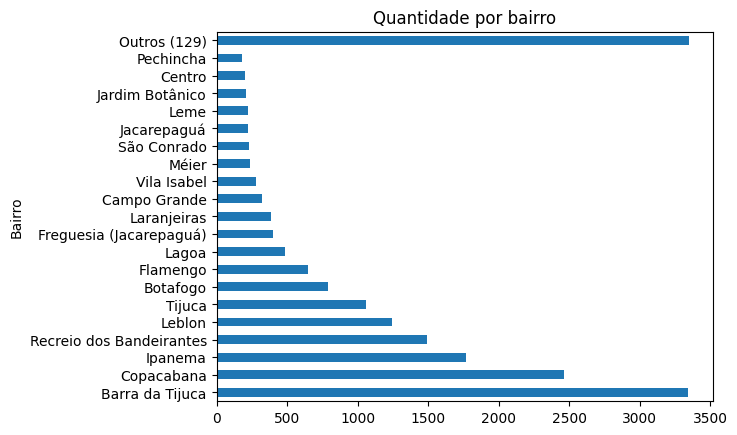

In [ ]:
summary = 20

quant_bairro = apartment_rent.Bairro.value_counts()
summary_left = len(quant_bairro) - summary
quant_bairro[summary] = quant_bairro[summary:].sum()
quant_bairro.rename(index={quant_bairro.index[summary]: 'Outros (%d)' % summary_left}, inplace=True)
quant_bairro = quant_bairro[:summary+1]
quant_bairro.plot(kind='barh', title='Quantidade por bairro')

array([[<Axes: title={'center': 'Quartos'}>,
        <Axes: title={'center': 'Vagas'}>],
       [<Axes: title={'center': 'Suites'}>, <Axes: >]], dtype=object)

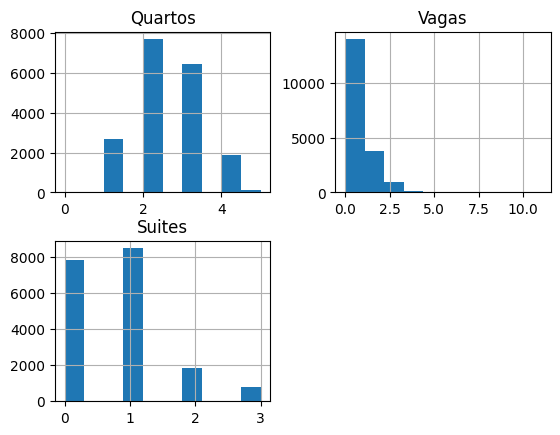

In [ ]:
quartos_outliers = get_outliers(apartment_rent, 'Quartos')
vagas_outliers = get_outliers(apartment_rent, 'Vagas')
suites_outliers = get_outliers(apartment_rent, 'Suites')
mask = ~quartos_outliers & ~vagas_outliers & ~suites_outliers
apartment_rent.loc[mask].hist(column=['Quartos', 'Vagas', 'Suites'])

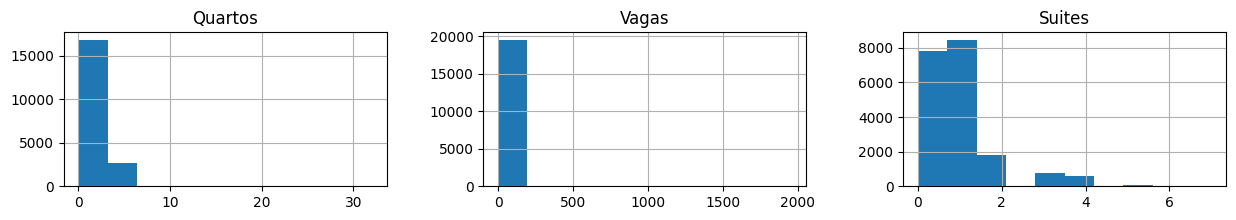

In [ ]:
apartment_rent.hist(column=['Quartos', 'Vagas', 'Suites'], layout=(1, 3), figsize=(15, 2));